# Diabetes Prediction

Gloria Pintado Phase 3 DS Live

## Diabetes Model Predictor for 'For Better Health' NonProfit organization

For Better Health is a new organization and are recruiting members. I have been hired by this nonprofit organization that wants to help communities far from cities in need of medical support for their health conditions.

Their main concern is now having a model to predict if the population there is at risk of diabetes or already has diabetes. For them to see if they bring a doctor who specializes in diabetes and nutritionists.

## Problem

Which model is best to predict is they have diabetes or not? 
Can playing with hyperparameter tunning get us a better model? Getting a solution will reduce the cause of also getting  serious health problems such as heart diseases, vision loss, and other diseases by the cause of having diabetes. 

## Data Source

The data used is from Kaggle Diabetes Health Indicator Dataset 
(https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv)

Having 21 features in this dataset for indicating risk factors for Diabetes:

Our target variable will  Diabetes binary: 
- 0 = no diabetes 1 = prediabetes or diabetes

### Importing libraries

In [183]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif

import warnings 
warnings.filterwarnings('ignore')

### Load from CSV

In [184]:
diabetes_indicators = pd.read_csv("Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

## Exploring Data

In [185]:
diabetes_indicators.shape

(70692, 22)

In [186]:
diabetes_indicators.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [187]:
diabetes_indicators.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [188]:
diabetes_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [189]:
diabetes_indicators.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Observations
- From the count row we can see there is no missing values
- Looking at the mean of 0.5 of the column diabetes binary we can tell it already has a balenced dateset between people without diabetes and with diabetes 

In [190]:
print(diabetes_indicators.nunique())

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


In [191]:
diabetes_indicators.Diabetes_binary.isnull().sum()

0

In [192]:
for column in diabetes_indicators.columns:
    print(diabetes_indicators[column].value_counts(normalize=True))
    print()

Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

HighBP
1.0    0.563458
0.0    0.436542
Name: proportion, dtype: float64

HighChol
1.0    0.525703
0.0    0.474297
Name: proportion, dtype: float64

CholCheck
1.0    0.975259
0.0    0.024741
Name: proportion, dtype: float64

BMI
27.0    0.089501
26.0    0.070376
28.0    0.064831
24.0    0.062129
30.0    0.061450
          ...   
85.0    0.000014
83.0    0.000014
80.0    0.000014
78.0    0.000014
74.0    0.000014
Name: proportion, Length: 80, dtype: float64

Smoker
0.0    0.524727
1.0    0.475273
Name: proportion, dtype: float64

Stroke
0.0    0.937829
1.0    0.062171
Name: proportion, dtype: float64

HeartDiseaseorAttack
0.0    0.85219
1.0    0.14781
Name: proportion, dtype: float64

PhysActivity
1.0    0.703036
0.0    0.296964
Name: proportion, dtype: float64

Fruits
1.0    0.611795
0.0    0.388205
Name: proportion, dtype: float64

Veggies
1.0    0.788774
0.0    0.211226
Name: proportion, dtype: float64

HvyAlcohol

- Target will be Diabetes_binary 0 = No Diabetes, 1 = Prediabetes or Diabetes

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

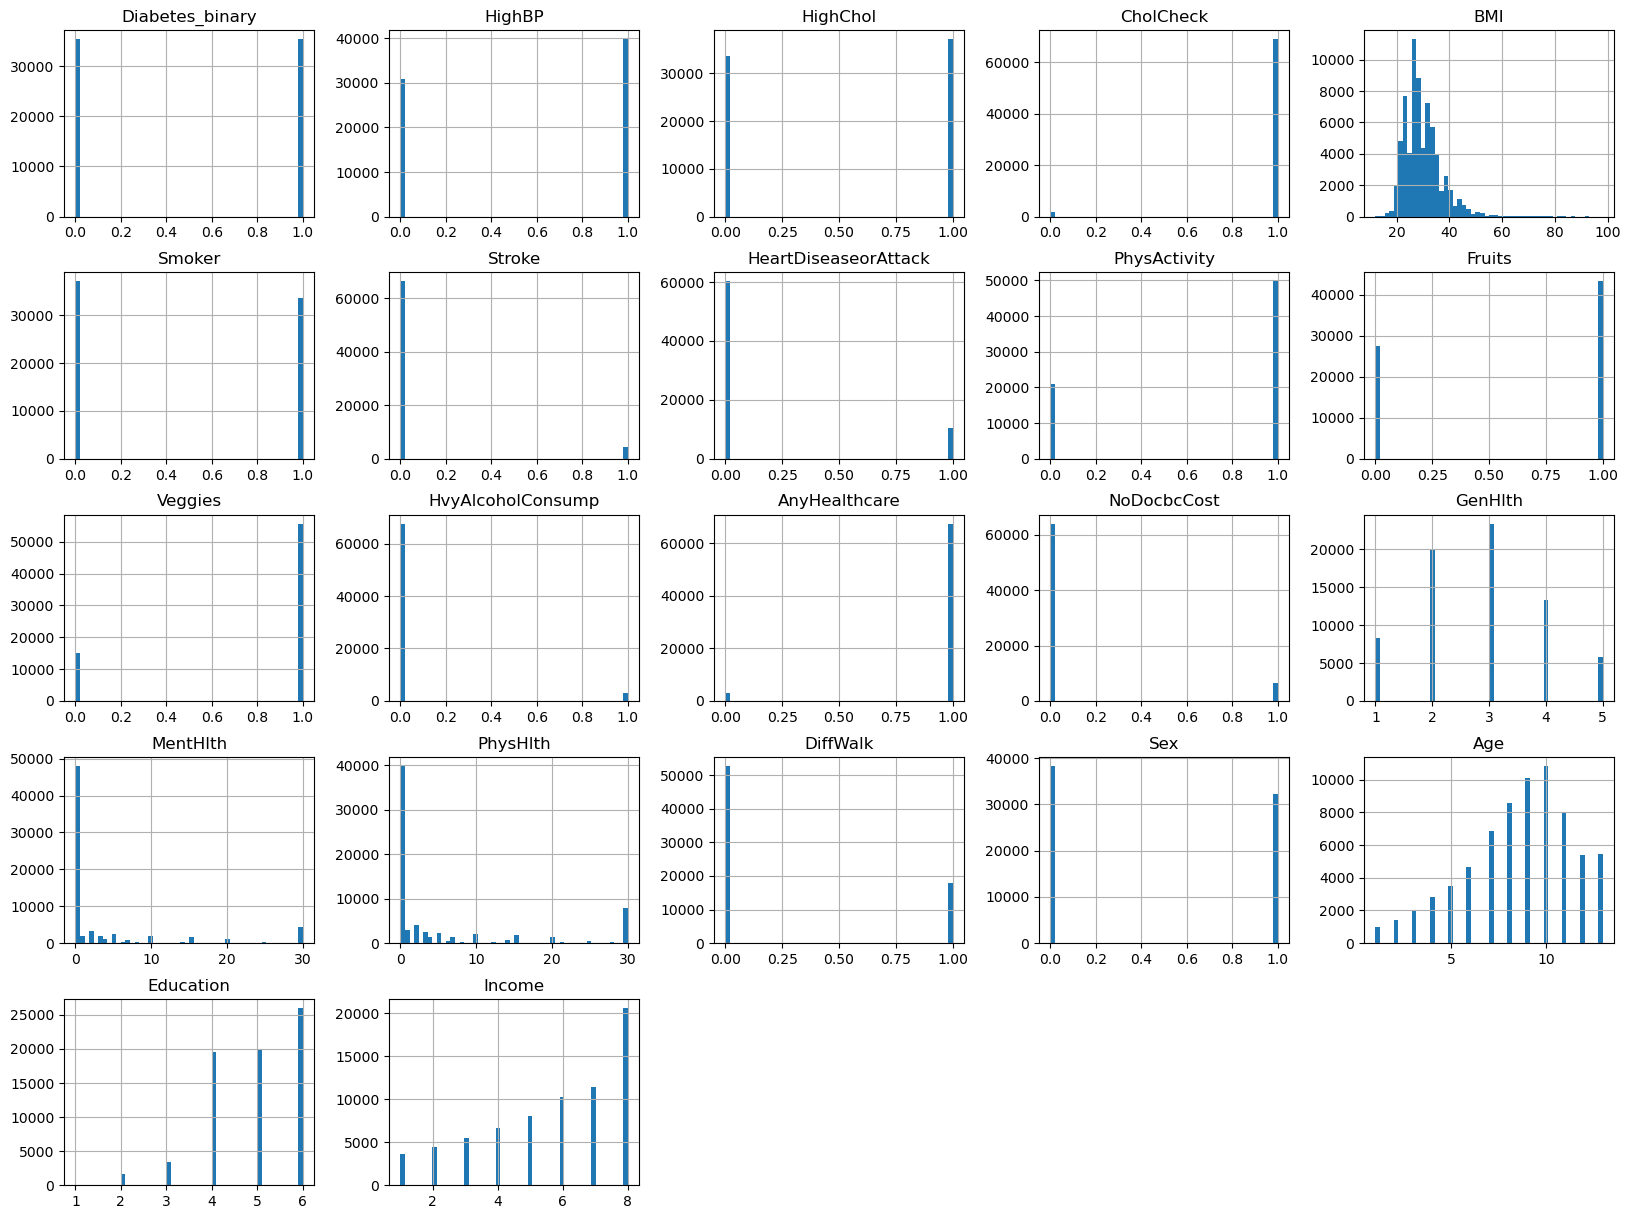

In [193]:
diabetes_indicators.hist(bins=50, figsize=(20,15)) 

Text(0.5, 1.0, 'Correlation Heatmap')

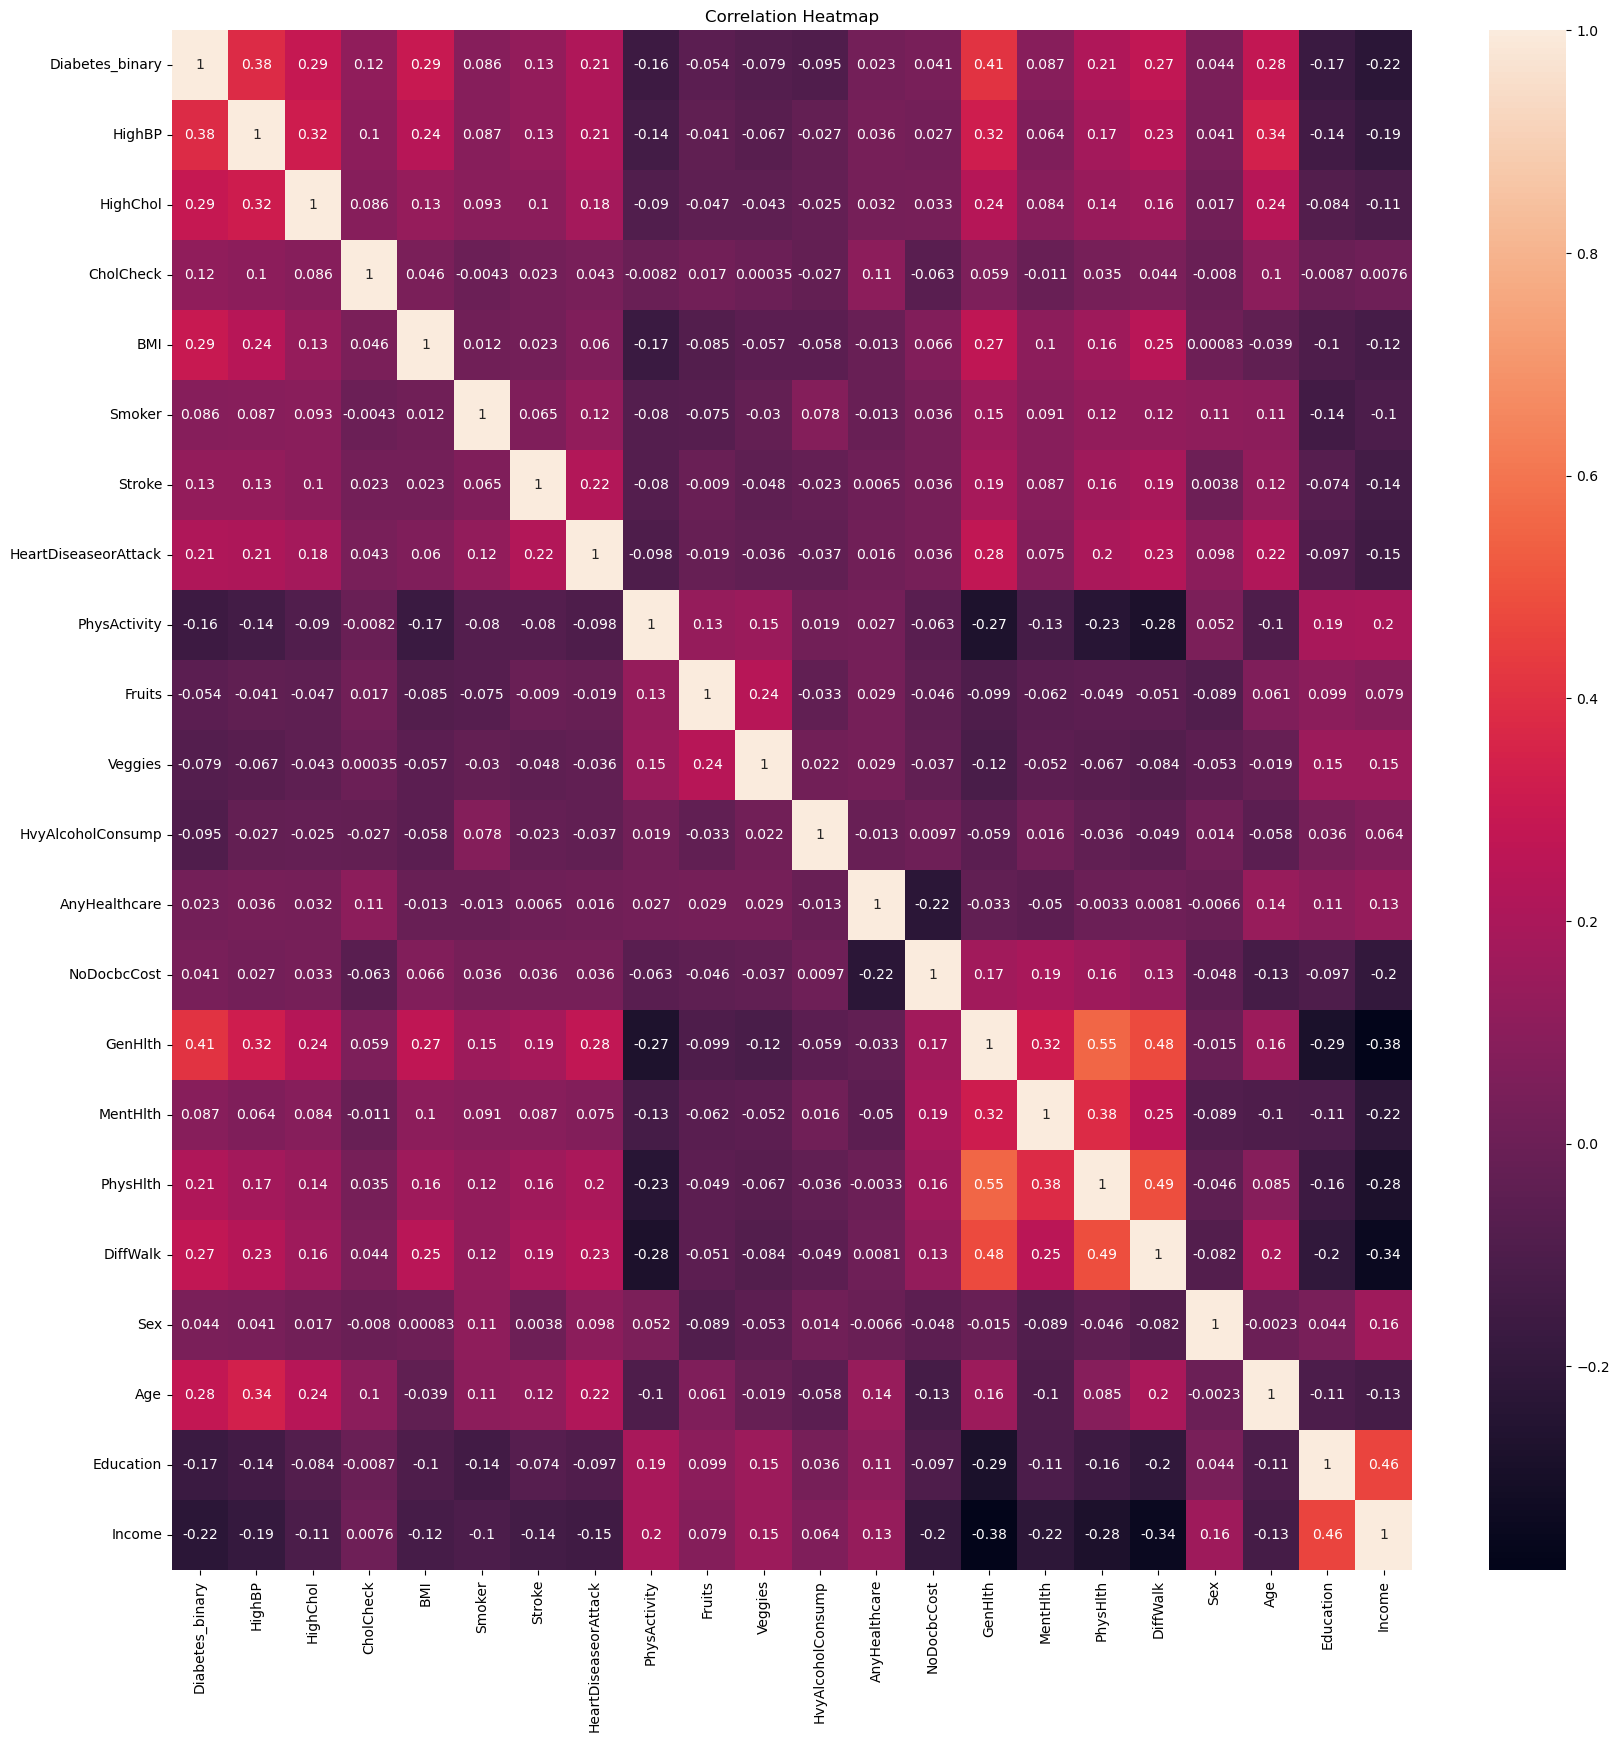

In [194]:
#correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(diabetes_indicators.corr(), annot=True).set_title('Correlation Heatmap')

## Features correlation with target 'Diabetes Binary'

In [195]:
correlations = diabetes_indicators.corr()
print(correlations['Diabetes_binary'].sort_values(ascending=False))

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


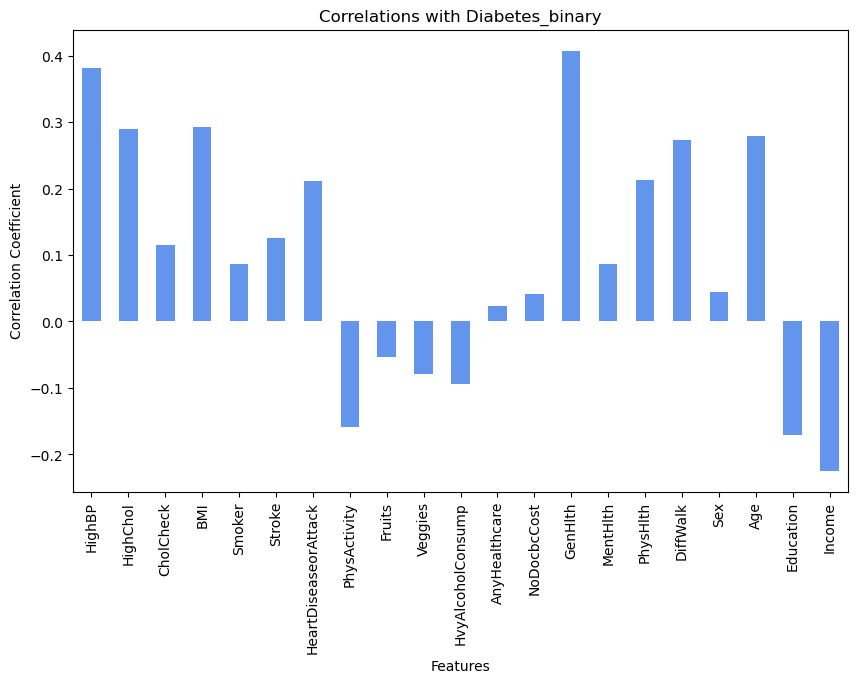

In [196]:
correlations_with_target = correlations['Diabetes_binary'].drop('Diabetes_binary')  # Drop the target column itself

# Create a bar plot
plt.figure(figsize=(10, 6))
correlations_with_target.plot(kind='bar', color='cornflowerblue')
plt.title('Correlations with Diabetes_binary')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

### Observations
- Features that are more correlated with the target variable Diabetes_binary : HighBP, GenHlth, HighChol, BMI, DiffWalk, Age
  HeartDiseaseorAttack, PhysHlth, Income, Education, Physactivity. 
- The less features correlated with Diabetes_binary are : Sex, NoDocbcCost, AnyHealthcare, Fruits, Veggies, HyAlcoholConsump

- However, we will not be dropping any columns since I think there can be small changes in the model if we even drop negatively correlated features.

In [197]:
diabetes_indicators['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

**Data is balanced!**

# Logistic Regression (Baseline Model)

### Prepoccesing

In [198]:
X = diabetes_indicators.drop(columns='Diabetes_binary')
y = diabetes_indicators['Diabetes_binary']

#  Split Train and Test Data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

### Scaled Data

In [199]:
# Scale the data for modeling
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Recall Metric of our Baseline Model

In [201]:
test_preds = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7489155035835534
Precision: 0.7381424706943192
Recall: 0.7717545017441312
F1 score: 0.7545743651196017


- Our recall score for our baseline model is 0.771

### Predict on the Test set

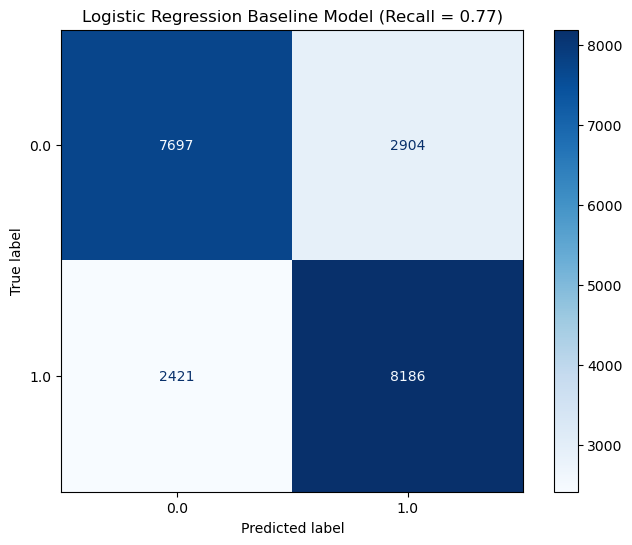

In [202]:
cm = confusion_matrix(y_test, test_preds)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format="d")
# Set the title
ax.set_title("Logistic Regression Baseline Model (Recall = 0.77)")
# Display the plot
plt.show()

- We have 2421 false negatives meaning we have to decrease it, for decreasing false negatives we need to used the recall metric.

In [203]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### Baseline Model ROC Curve

In [204]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, test_probas)

0.8256928485812599

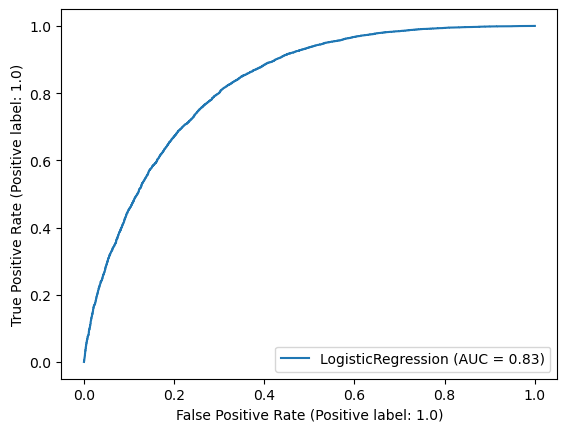

In [205]:
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test);

# Decision Tree Model

In [206]:
Tree = DecisionTreeClassifier(random_state=42)
# Fit the model to the training data
Tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### Predict on the Decision Tree Test set

In [207]:
test_preds = Tree.predict(X_test_scaled)
recall = recall_score(y_test, test_preds)

accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.6589023010184836
Precision: 0.6604509561411854
Recall: 0.6544734609220326
F1 score: 0.6574486220286011


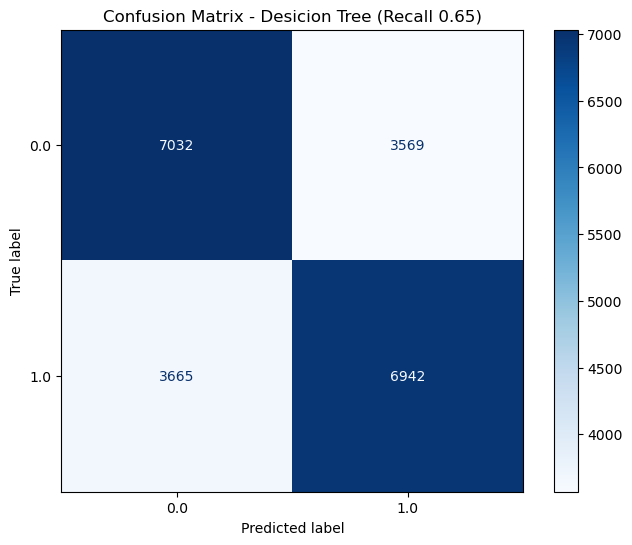

In [208]:
cm = confusion_matrix(y_test, test_preds)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Tree.classes_)
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format="d")
# Set the title
ax.set_title("Confusion Matrix - Desicion Tree (Recall 0.65)")
# Display the plot
plt.show()

**Our recall did worse in the Decion Tree Model**

### Decision Tree ROC Curve

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
test_probas = Tree.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, test_probas)

0.6587241285406804

## Comparing ROC Curves from both Models

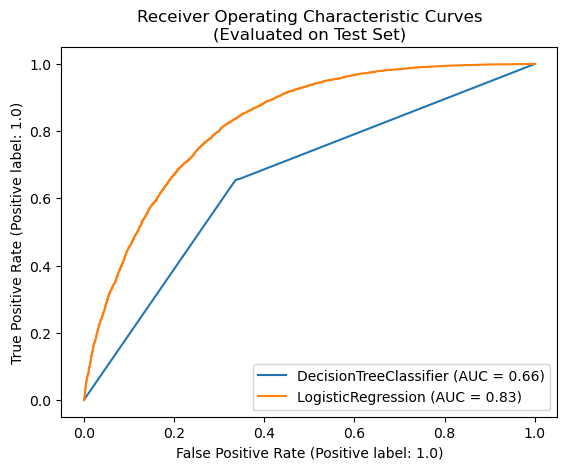

In [210]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(Tree, X_test_scaled, y_test, ax=ax)
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

**As we can see Logistic Regression was better than DecisionTree. Our next step will be tuning our  hyperparameter in our Logistic Regression Model to see if it can change for better. Not doing the hyperparameter tunning in our decision tree since it did a lot worse.**

# Hyperparameter Tuning in Logistic Regression (Baseline Model)

### Cross Validiton Scores

In [211]:
logreg = LogisticRegression(random_state=42)

cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='recall')

print("Cross-Validation Scores (Recall):", cv_scores)

mean_cv_recall = cv_scores.mean()
std_cv_recall = cv_scores.std()
print("Mean CV Recall Score:", mean_cv_recall)
print("Std CV Recall Score:", std_cv_recall)

Cross-Validation Scores (Recall): [0.76697656 0.76515764 0.76798707 0.76616815 0.76854659]
Mean CV Recall Score: 0.7669672007515721
Std CV Recall Score: 0.00122046634546518


### Logistic Regression Model Tunning with the C's

In [212]:
c_list = [10.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in c_list:
        log_reg = LogisticRegression (C=i, random_state=42)
        log_reg.fit(X_train_scaled, y_train)
        y_hat_train = log_reg.predict (X_train_scaled)
        y_hat_test = log_reg.predict (X_test_scaled)
        recall_train = recall_score(y_train, y_hat_train)
        recall_test = recall_score (y_test, y_hat_test)
        
        print(f"Recall for C = {i} on training data is: {round( recall_train, 3)}")
        print (f"Recall for C = {i} on test data is: {round(recall_test,3)}")

Recall for C = 10.001 on training data is: 0.767
Recall for C = 10.001 on test data is: 0.772
Recall for C = 0.01 on training data is: 0.767
Recall for C = 0.01 on test data is: 0.771
Recall for C = 0.1 on training data is: 0.767
Recall for C = 0.1 on test data is: 0.772
Recall for C = 1 on training data is: 0.767
Recall for C = 1 on test data is: 0.772
Recall for C = 10 on training data is: 0.767
Recall for C = 10 on test data is: 0.772
Recall for C = 100 on training data is: 0.767
Recall for C = 100 on test data is: 0.772
Recall for C = 1000 on training data is: 0.767
Recall for C = 1000 on test data is: 0.772


### Logistic Regression Model Tunning with the Penalties

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

C_list = [10.001, 0.01, 0.1, 1, 10, 100, 1000]
penalties = ['l1', 'l2']

for penalty in penalties:
    for C in C_list:
        if penalty == 'l1':
            solver = 'liblinear'
        else:
            solver = 'lbfgs'  
        log_reg = LogisticRegression(C=C, penalty=penalty, random_state=42, solver=solver)
        log_reg.fit(X_train_scaled, y_train)
        
        y_hat_train = log_reg.predict(X_train_scaled)
        y_hat_test = log_reg.predict(X_test_scaled)
        
        recall_train = recall_score(y_train, y_hat_train)
        recall_test = recall_score(y_test, y_hat_test)
        
        print(f"Recall for Penalty = {penalty}, C = {C} on training data is: {round(recall_train, 3)}")
        print(f"Recall for Penalty = {penalty}, C = {C} on test data is: {round(recall_test, 3)}")

Recall for Penalty = l1, C = 10.001 on training data is: 0.767
Recall for Penalty = l1, C = 10.001 on test data is: 0.772
Recall for Penalty = l1, C = 0.01 on training data is: 0.77
Recall for Penalty = l1, C = 0.01 on test data is: 0.775
Recall for Penalty = l1, C = 0.1 on training data is: 0.768
Recall for Penalty = l1, C = 0.1 on test data is: 0.772
Recall for Penalty = l1, C = 1 on training data is: 0.767
Recall for Penalty = l1, C = 1 on test data is: 0.772
Recall for Penalty = l1, C = 10 on training data is: 0.767
Recall for Penalty = l1, C = 10 on test data is: 0.772
Recall for Penalty = l1, C = 100 on training data is: 0.767
Recall for Penalty = l1, C = 100 on test data is: 0.772
Recall for Penalty = l1, C = 1000 on training data is: 0.767
Recall for Penalty = l1, C = 1000 on test data is: 0.772
Recall for Penalty = l2, C = 10.001 on training data is: 0.767
Recall for Penalty = l2, C = 10.001 on test data is: 0.772
Recall for Penalty = l2, C = 0.01 on training data is: 0.767
Re

### Logistic Regression Model Tunning with the Solver

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solvers = []
for C in C_list:
    for solver in solver_list:
        logreg = LogisticRegression(C=C, random_state=42, solver=solver)
        logreg.fit(X_train_scaled, y_train)
        
        y_hat_train = logreg.predict(X_train_scaled)
        y_hat_test = logreg.predict(X_test_scaled)
        
        recall_train = recall_score(y_train, y_hat_train)
        recall_test = recall_score(y_test, y_hat_test)
        solvers.append((C, solver,recall_train,recall_test))
        #print(f"Recall for C = {C}, Solver = {solver} on training data is: {round(recall_train, 3)}")
        #print(f"Recall for C = {C}, Solver = {solver} on test data is: {round(recall_test, 3)}")
solvers.sort(key=(lambda x:x[3]), reverse=True)
solvers[:3]

[(0.1, 'newton-cg', 0.767209668943773, 0.7717545017441312),
 (0.1, 'lbfgs', 0.767209668943773, 0.7717545017441312),
 (0.1, 'liblinear', 0.767209668943773, 0.7717545017441312)]

**Tunning our Baseline model with the Penalties, C's, and Solvers did not have a significant impact in our model's performance.**

# Logistic Regression (Baseline Model) with the highest 15 Features correlated 

After seeing the baseline model having in count all of the features that where correlated with the Target and did well. However,
tunning did not give a better impact. Now I will make another Model but using the best 15 features that are most correlated with the target.

### Preproccesing

In [215]:
#Dropping the colummns with the less corralated features having as target Diabetes binary
columns_to_drop = ['Fruits', 'Veggies', 'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Income']

diabetes_filtered = diabetes_indicators.drop(columns=columns_to_drop)

In [216]:
new_X = diabetes_filtered.drop(columns='Diabetes_binary')
new_y = diabetes_filtered['Diabetes_binary']

# Split the new dataframe being used into new_X_train and new_X_test
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
    new_X, new_y, test_size=0.30, random_state=42)

In [217]:
# Seeing the dataframe with columns dropped
new_X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

### Scaled Data for Model with the highest 15 Features correlated

In [218]:
new_scaler = StandardScaler()

new_scaler.fit(new_X_train)

new_X_train_scaled = new_scaler.transform(new_X_train)
new_X_test_scaled = new_scaler.transform(new_X_test)

In [219]:
new_logreg = LogisticRegression(random_state=42)
new_logreg.fit(new_X_train_scaled, new_y_train)

LogisticRegression(random_state=42)

### Predict on the New Test set for Model with the highest 15 Features correlated

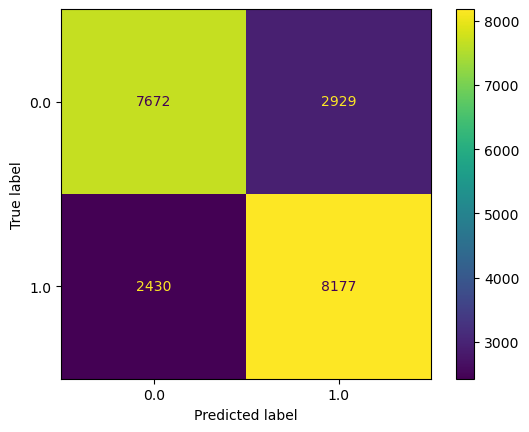

In [220]:
ConfusionMatrixDisplay.from_estimator(new_logreg, new_X_test_scaled, new_y_test);

Our recall in this new Test for Model with the highest 15 featurse correlated this a lit bit worse. \
Our false negatives in this model above is 2430 and our false negatives from our baseline model is 2421. \
Showing  Logistic Regression Baseline Model is yet the best.

### Recall Metric of our Logistic Regression Baseline Model with the highest 15 Features correlated

In [221]:
new_test_preds = new_logreg.predict(new_X_test_scaled)

accuracy = accuracy_score(new_y_test, new_test_preds)
precision = precision_score(new_y_test, new_test_preds)
recall = recall_score(new_y_test, new_test_preds)
f1 = f1_score(new_y_test, new_test_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7473123349679366
Precision: 0.7362686835944534
Recall: 0.7709060054680871
F1 score: 0.7531893335789619


### Logistic Regression ROC Curve for Model with the highest 15 Features correlated

In [222]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
new_test_probas = new_logreg.predict_proba(new_X_test_scaled)[:,1]

roc_auc_score(new_y_test, new_test_probas)

0.8229135517125304

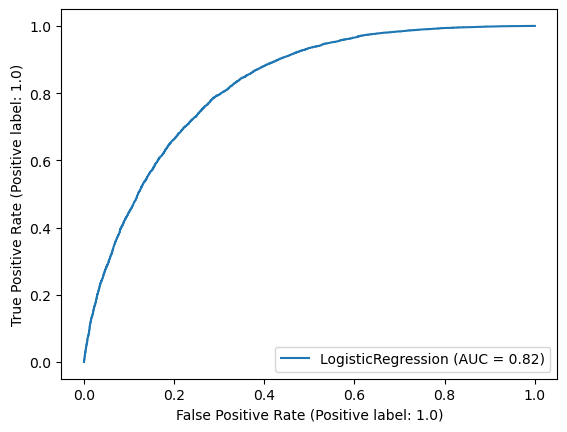

In [223]:
RocCurveDisplay.from_estimator(new_logreg, new_X_test_scaled, new_y_test);

### Decision Tree Model for Logistic Regression (Baseline Model) with the highest 15 Features correlated

In [224]:
new_Tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
new_Tree.fit(new_X_train_scaled, new_y_train)

DecisionTreeClassifier(random_state=42)

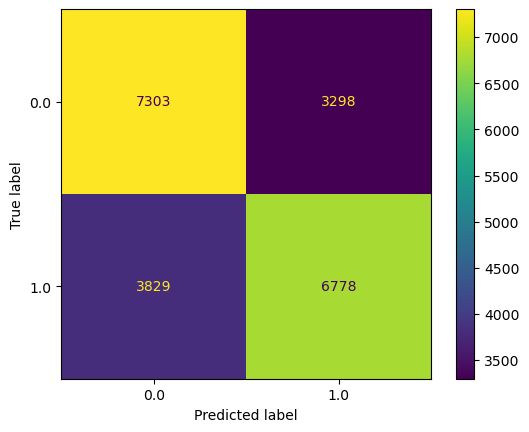

In [225]:
ConfusionMatrixDisplay.from_estimator(new_Tree, new_X_test_scaled, new_y_test);

In [226]:
new_test_preds = new_Tree.predict(new_X_test_scaled)

accuracy = accuracy_score(new_y_test, new_test_preds)
precision = precision_score(new_y_test, new_test_preds)
recall = recall_score(new_y_test, new_test_preds)
f1 = f1_score(new_y_test, new_test_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.6639475669558658
Precision: 0.6726875744342993
Recall: 0.6390119732252286
F1 score: 0.6554174926267949


In [227]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay
new_test_probas = new_Tree.predict_proba(new_X_test_scaled)[:,1]

roc_auc_score(new_y_test, new_test_probas)

0.6716121492386928

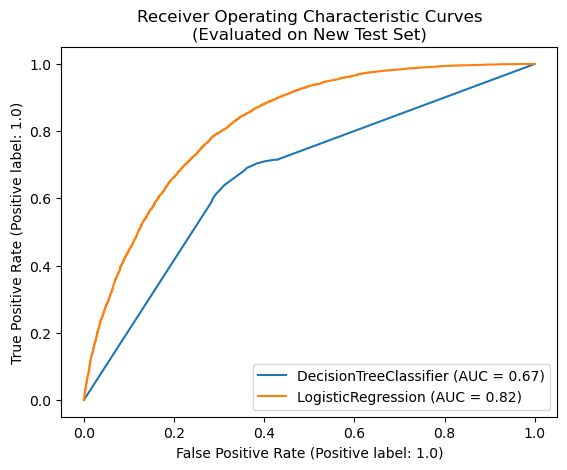

In [228]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(new_Tree, new_X_test_scaled, new_y_test, ax=ax)
RocCurveDisplay.from_estimator(new_logreg, new_X_test_scaled, new_y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on New Test Set)")
plt.show()

**Again our Logistic Regression (Baseline Model) with the highest 15 Features correlated is doing better the Decision Tree.**

# Tunning hyperparameters with our New Model

### Cross Validiton Scores 

In [229]:
new_logreg = LogisticRegression(random_state=42)

new_cv_scores = cross_val_score(new_logreg, new_X_train_scaled, new_y_train, cv=5, scoring='recall')

print("Cross-Validation Scores (Recall):", new_cv_scores)

new_mean_cv_recall = cv_scores.mean()
new_std_cv_recall = cv_scores.std()
print("New Mean CV Recall Score:", new_mean_cv_recall)
print("New Std CV Recall Score:", new_std_cv_recall)

Cross-Validation Scores (Recall): [0.76434923 0.76172191 0.76495554 0.76940178 0.76773802]
New Mean CV Recall Score: 0.7669672007515721
New Std CV Recall Score: 0.00122046634546518


## Logistic Regression (Baseline Model) with the highest 15 Features correlated Tunning with the C's

In [230]:
new_c_list = [10.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in new_c_list:
        new_log_reg = LogisticRegression (C=i, random_state=42)
        new_log_reg.fit(new_X_train_scaled, new_y_train)
        y_hat_train = new_log_reg.predict (new_X_train_scaled)
        y_hat_test = new_log_reg.predict (new_X_test_scaled)
        recall_train = recall_score(y_train, y_hat_train)
        recall_test = recall_score (y_test, y_hat_test)
        
        print(f"Recall for C = {i} on training data is: {round( recall_train, 3)}")
        print (f"Recall for C = {i} on test data is: {round(recall_test,3)}")

Recall for C = 10.001 on training data is: 0.765
Recall for C = 10.001 on test data is: 0.771
Recall for C = 0.01 on training data is: 0.766
Recall for C = 0.01 on test data is: 0.771
Recall for C = 0.1 on training data is: 0.765
Recall for C = 0.1 on test data is: 0.771
Recall for C = 1 on training data is: 0.765
Recall for C = 1 on test data is: 0.771
Recall for C = 10 on training data is: 0.765
Recall for C = 10 on test data is: 0.771
Recall for C = 100 on training data is: 0.765
Recall for C = 100 on test data is: 0.771
Recall for C = 1000 on training data is: 0.765
Recall for C = 1000 on test data is: 0.771


**Still no massive change for New Model using again hyperparameters.**

# Features Importance

In [231]:
from sklearn.feature_selection import SelectKBest, f_classif

# Create a SelectKBest instance with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k=11)

# Fit the selector to your data
fit = selector.fit(X_train, y_train.values.ravel())

# Get the F-statistic scores for each feature
scores = fit.scores_

# Transform your data to include only the top K features
features = fit.transform(X_train_scaled)


In [232]:
Top_Features = pd.DataFrame()
Top_Features['Features'] = X_train.columns
Top_Features['Feature Importance Score'] = scores
Top_Features = Top_Features.sort_values(by='Feature Importance Score', ascending=False)
Top_Features

,Features,Feature Importance Score
13,GenHlth,9761.228670
0,HighBP,8455.882284
3,BMI,4647.391387
1,HighChol,4555.200096
18,Age,4177.580423
16,DiffWalk,3942.686731
20,Income,2595.679600
15,PhysHlth,2311.851881
6,HeartDiseaseorAttack,2288.972118
19,Education,1457.331789


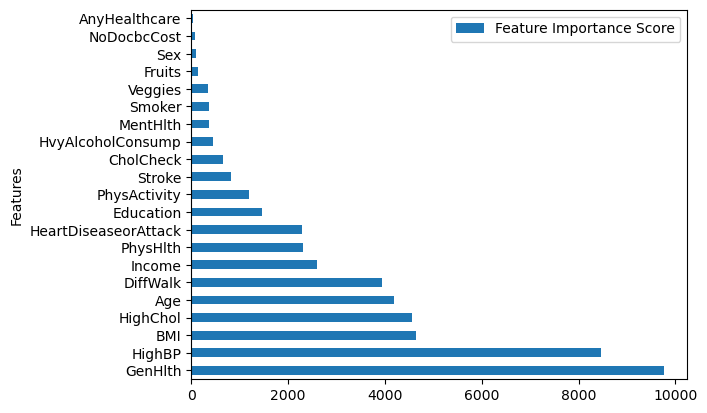

In [233]:
Top_Features.plot.barh(x='Features', y='Feature Importance Score')
plt.show()

# CONCLUSION

- **Our first Logistic Regression Baseline Model it by little difference the best model.**
- **Tuning our hyperparameter did not make a lot chance to gain a better model.**
- **Our top ten features that should be more aware to not be risk of having prediabetes or diabetes are : GenHith, HighBP, BMI, HighChol,
  Age, DiffWalk, Income, PhysHith, HeartDiseaseorAttack.**
